In [59]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

import numpy as np
import matplotlib.pyplot as plt


In [60]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, regularizers
from tensorflow.keras import callbacks


In [61]:

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [62]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [63]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [64]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

/tmp/ipykernel_36/947791899.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


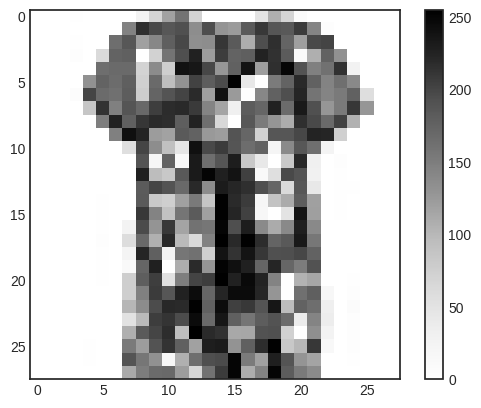

In [65]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

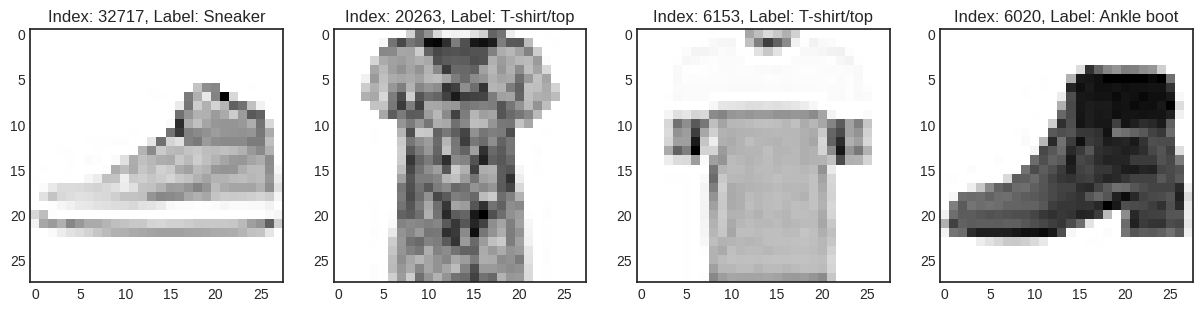

In [66]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

In [67]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [68]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [70]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [71]:
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

In [72]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [73]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [74]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2489 - loss: 2.2245 - val_accuracy: 0.4652 - val_loss: 1.9959
Epoch 2/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5688 - loss: 1.9358 - val_accuracy: 0.5558 - val_loss: 1.7817
Epoch 3/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6376 - loss: 1.7300 - val_accuracy: 0.6467 - val_loss: 1.6037
Epoch 4/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6694 - loss: 1.5664 - val_accuracy: 0.6612 - val_loss: 1.4667
Epoch 5/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6825 - loss: 1.4361 - val_accuracy: 0.6868 - val_loss: 1.3586
Epoch 6/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6971 - loss: 1.3273 - val_accuracy: 0.6943 - val_loss: 1.2699
Epoch 7/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7119 - loss: 1.2444 - val_accuracy: 0.6908 - val_loss: 1.1946
Epoch 8/60
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7065 - loss: 1.1807 - val_accuracy: 0.7083 - v

In [75]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

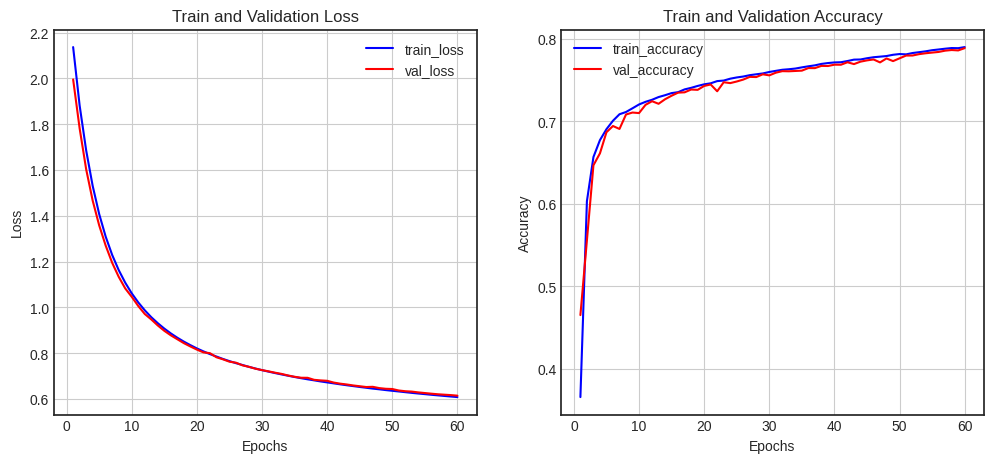

In [76]:
show_history(history)

In [77]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7813 - loss: 0.6243


[0.6287802457809448, 0.7784000039100647]

In [78]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.8229336e-02 9.4497043e-01 3.3973090e-03 1.0585923e-02 1.6349033e-02
 3.3575849e-05 6.3449270e-03 2.2314565e-05 5.5783141e-05 1.1427355e-05]
1
Trouser


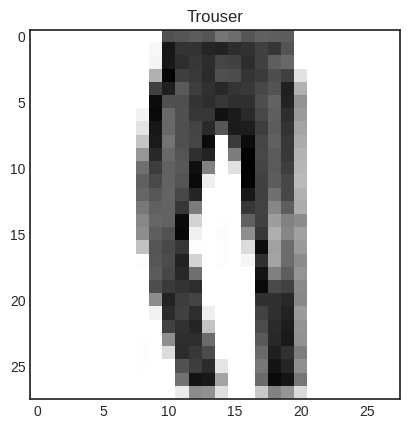

In [79]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [80]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [81]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

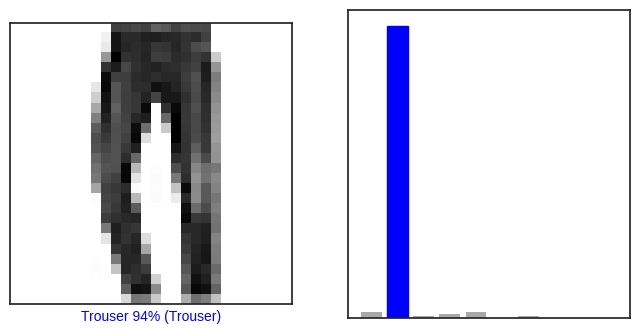

In [82]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

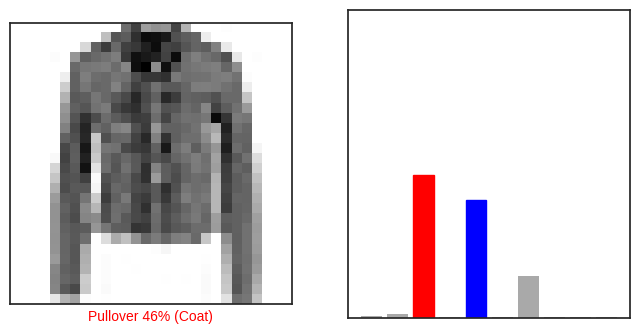

In [83]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

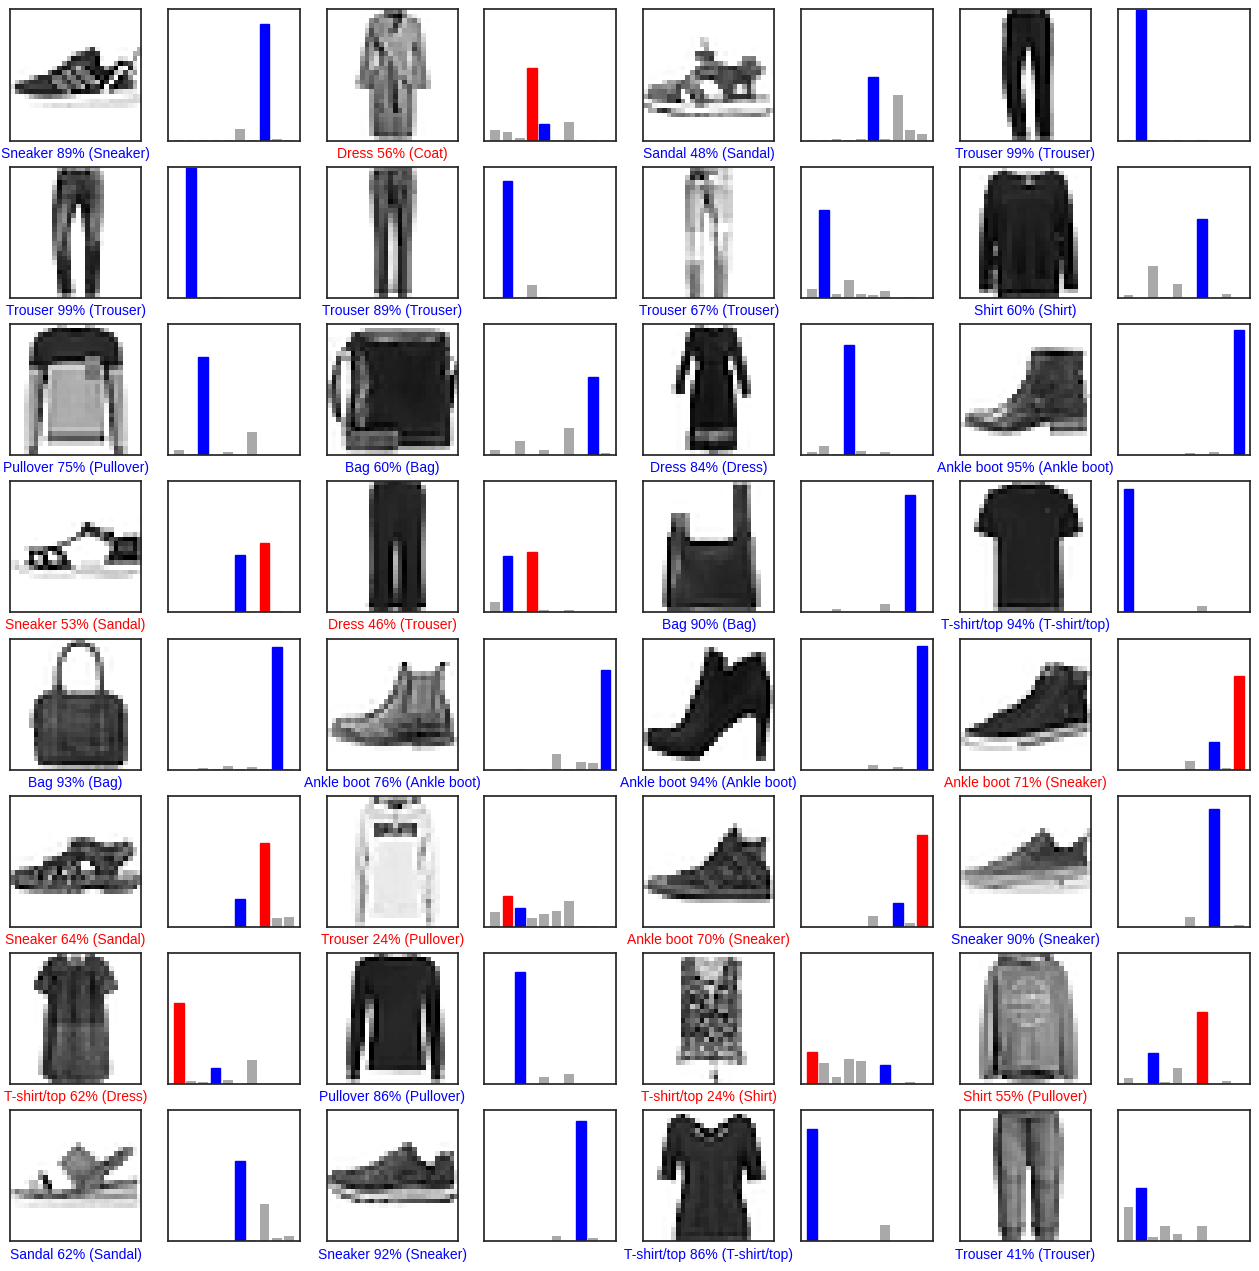

In [84]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [85]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.72      0.81      0.76      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.70      0.58      0.64      1000
       Dress       0.79      0.82      0.81      1000
        Coat       0.66      0.72      0.69      1000
      Sandal       0.84      0.81      0.83      1000
       Shirt       0.47      0.44      0.46      1000
     Sneaker       0.83      0.86      0.84      1000
         Bag       0.91      0.92      0.91      1000
  Ankle boot       0.87      0.92      0.89      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



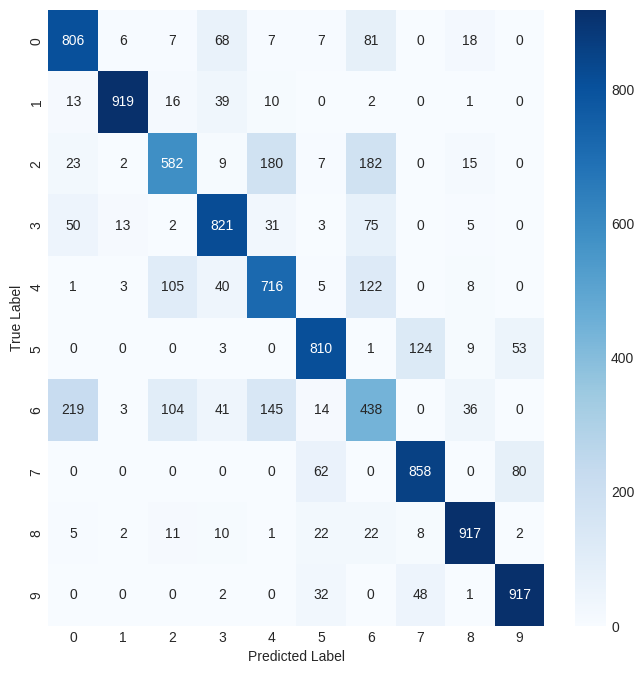

In [86]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [87]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7923 - loss: 0.6015 - val_accuracy: 0.7924 - val_loss: 0.5886
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7979 - loss: 0.5797 - val_accuracy: 0.8051 - val_loss: 0.5618
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8055 - loss: 0.5551 - val_accuracy: 0.8108 - val_loss: 0.5476
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8136 - loss: 0.5283 - val_accuracy: 0.8156 - val_loss: 0.5304
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8181 - loss: 0.5194 - val_accuracy: 0.8185 - val_loss: 0.5202
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8221 - loss: 0.5087 - val_accuracy: 0.8223 - val_loss: 0.5102
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8261 - loss: 0.4934 - val_accuracy: 0.8231 - val_loss: 0.5058
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8277 - loss: 0.4880 - 

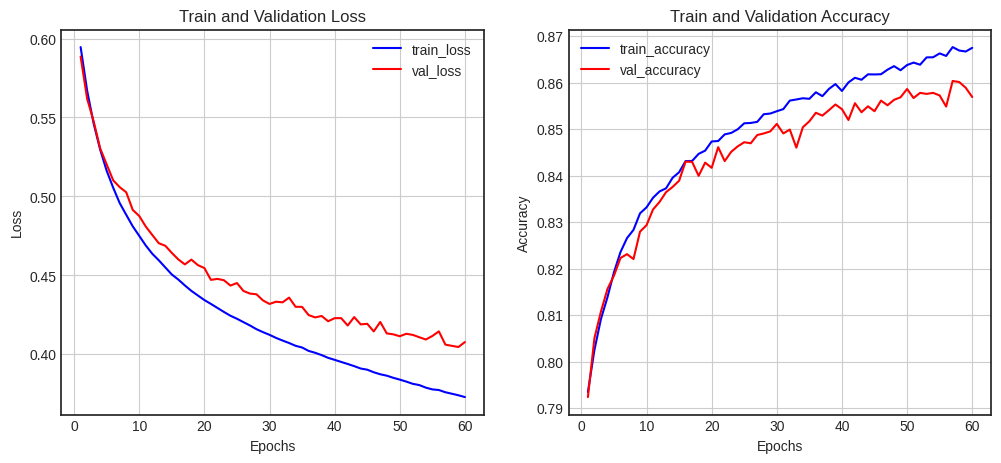

In [88]:
show_history(history)

In [89]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8540 - loss: 0.4198


[0.4242364168167114, 0.8464999794960022]

In [92]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))   
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
check_point_cb = callbacks.ModelCheckpoint(
    'fashion_mnist_model.h5',
    save_best_only=True
)
early_stopping_cb = callbacks.EarlyStopping(
    patience=10,
    monitor='val_loss',
    restore_best_weights=True
)

In [93]:
history2 = model.fit(
    x_train, y_train,
    epochs=60,
    validation_data=(x_val, y_val),
    callbacks=[check_point_cb, early_stopping_cb]
)

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7755 - loss: 0.6343 - val_accuracy: 0.8528 - val_loss: 0.4146
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8634 - loss: 0.3798 - val_accuracy: 0.8701 - val_loss: 0.3624
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8764 - loss: 0.3376 - val_accuracy: 0.8729 - val_loss: 0.3620
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8845 - loss: 0.3071 - val_accuracy: 0.8728 - val_loss: 0.3652
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8930 - loss: 0.2894 - val_accuracy: 0.8815 - val_loss: 0.3414
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8981 - loss: 0.2707 - val_accuracy: 0.8689 - val_loss: 0.3787
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9029 - loss: 0.2586 - val_accuracy: 0.8802 - val_loss: 0.3411
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9078 - loss: 0.2492 -

In [94]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

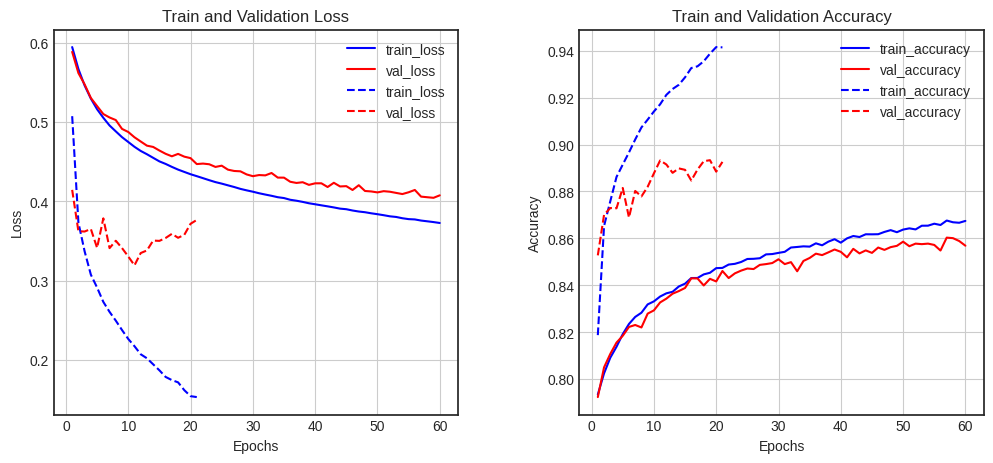

In [95]:
diff_history(history, history2)

In [96]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8809 - loss: 0.3435


[0.34722426533699036, 0.8797000050544739]

In [97]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

check_point_cb = callbacks.ModelCheckpoint(
    'fashion_mnist_model.h5',
    save_best_only=True
)
early_stopping_cb = callbacks.EarlyStopping(
    patience=10,
    monitor='val_loss',
    restore_best_weights=True
)



In [98]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7782 - loss: 0.6287 - val_accuracy: 0.8531 - val_loss: 0.4137
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8608 - loss: 0.3816 - val_accuracy: 0.8703 - val_loss: 0.3647
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8753 - loss: 0.3339 - val_accuracy: 0.8764 - val_loss: 0.3524
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8849 - loss: 0.3056 - val_accuracy: 0.8804 - val_loss: 0.3364
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8895 - loss: 0.2919 - val_accuracy: 0.8754 - val_loss: 0.3555
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8978 - loss: 0.2784 - val_accuracy: 0.8755 - val_loss: 0.3587
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9027 - loss: 0.2617 - val_accuracy: 0.8849 - val_loss: 0.3344
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9053 - loss: 0.2516

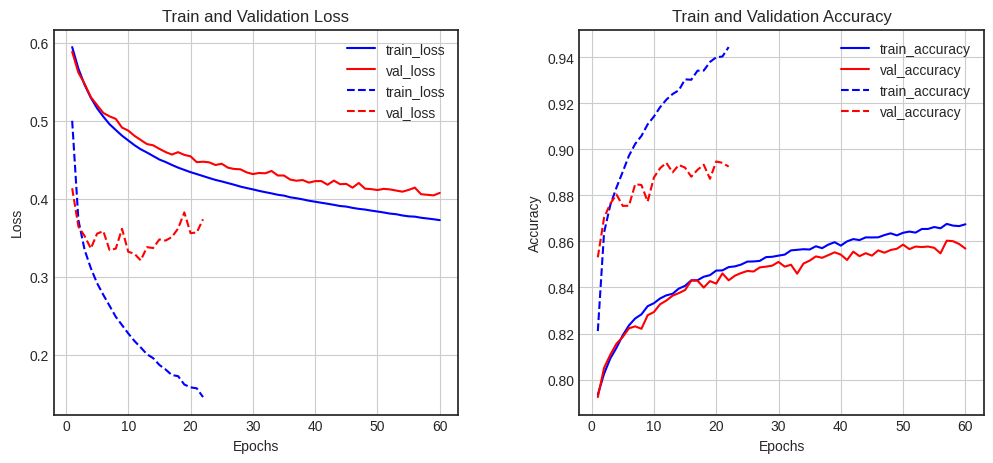

In [99]:
diff_history(history, history3)

In [100]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8830 - loss: 0.3421


[0.3422883152961731, 0.8841000199317932]

In [101]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

check_point_cb = callbacks.ModelCheckpoint(
    'fashion_mnist_model.h5',
    save_best_only=True
)
early_stopping_cb = callbacks.EarlyStopping(
    patience=10,
    monitor='val_loss',
    restore_best_weights=True
)



In [102]:
history4 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7726 - loss: 0.9938 - val_accuracy: 0.8139 - val_loss: 0.6387
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8352 - loss: 0.5810 - val_accuracy: 0.8426 - val_loss: 0.5536
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8466 - loss: 0.5256 - val_accuracy: 0.8438 - val_loss: 0.5318
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8515 - loss: 0.4980 - val_accuracy: 0.8504 - val_loss: 0.5070
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8588 - loss: 0.4784 - val_accuracy: 0.8593 - val_loss: 0.4821
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8630 - loss: 0.4591 - val_accuracy: 0.8525 - val_loss: 0.5054
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8643 - loss: 0.4543 - val_accuracy: 0.8653 - val_loss: 0.4609
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8657 - loss: 

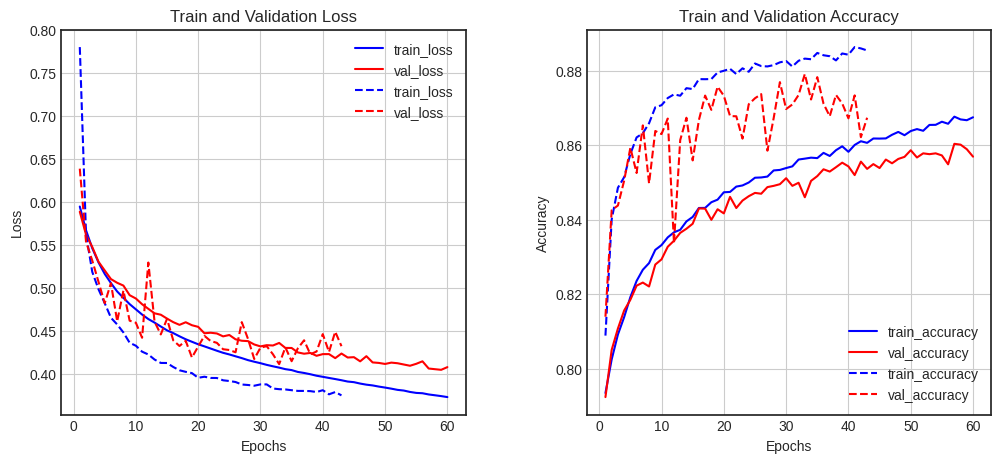

In [103]:
diff_history(history, history4)


In [104]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8651 - loss: 0.4257


[0.42809364199638367, 0.864300012588501]

In [105]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

check_point_cb = callbacks.ModelCheckpoint(
    'fashion_mnist_model.h5',
    save_best_only=True
)
early_stopping_cb = callbacks.EarlyStopping(
    patience=10,
    monitor='val_loss',
    restore_best_weights=True
)



In [106]:
history5 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7310 - loss: 1.1211 - val_accuracy: 0.8095 - val_loss: 0.6778
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8103 - loss: 0.6794 - val_accuracy: 0.8351 - val_loss: 0.5917
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8107 - loss: 0.6463 - val_accuracy: 0.8463 - val_loss: 0.5572
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8230 - loss: 0.6111 - val_accuracy: 0.8371 - val_loss: 0.5565
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8187 - loss: 0.6087 - val_accuracy: 0.8432 - val_loss: 0.5472
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8201 - loss: 0.6057 - val_accuracy: 0.8447 - val_loss: 0.5324
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8223 - loss: 0.6033 - val_accuracy: 0.8458 - val_loss: 0.5367
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8290 - loss: 0

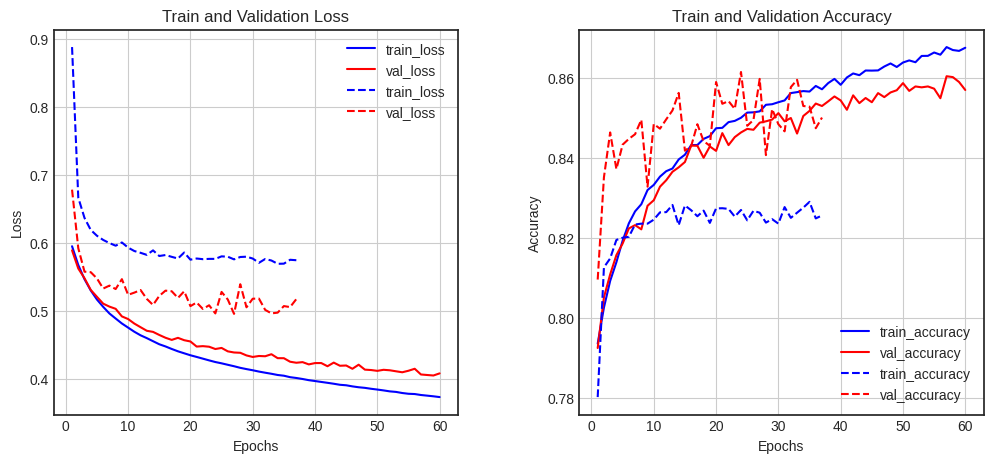

In [107]:
diff_history(history, history5)


In [108]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8548 - loss: 0.5107


[0.5176849961280823, 0.8507000207901001]

In [109]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

check_point_cb = callbacks.ModelCheckpoint(
    'fashion_mnist_model.h5',
    save_best_only=True
)
early_stopping_cb = callbacks.EarlyStopping(
    patience=10,
    monitor='val_loss',
    restore_best_weights=True
)



In [110]:
history6 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7496 - loss: 1.2187 - val_accuracy: 0.7927 - val_loss: 0.8038
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8132 - loss: 0.7184 - val_accuracy: 0.8173 - val_loss: 0.6450
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8119 - loss: 0.6554 - val_accuracy: 0.7291 - val_loss: 0.9941
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8131 - loss: 0.6404 - val_accuracy: 0.7965 - val_loss: 0.6789
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8150 - loss: 0.6320 - val_accuracy: 0.8198 - val_loss: 0.6070
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.8147 - loss: 0.6269 - val_accuracy: 0.7211 - val_loss: 1.0742
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8125 - loss: 0.6273 - val_accuracy: 0.8273 - val_loss: 0.6115
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.8163 - loss: 

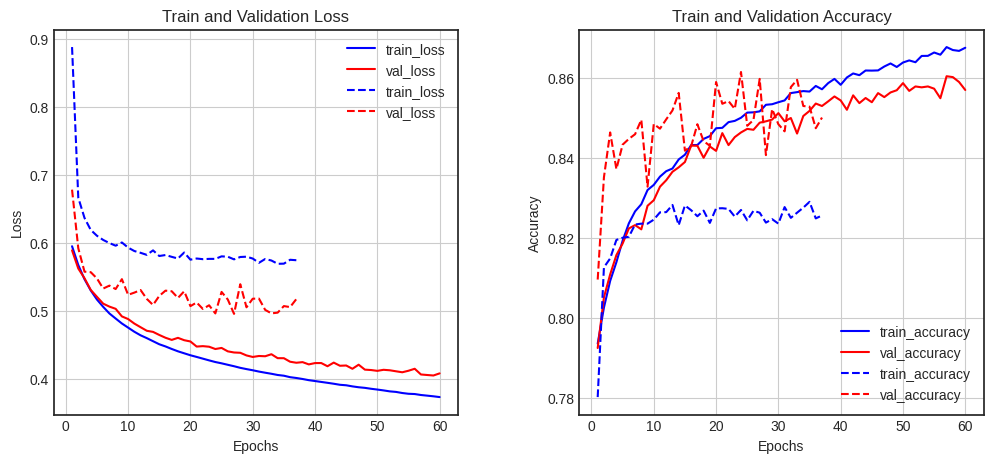

In [111]:
diff_history(history, history6)


In [112]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8393 - loss: 0.5542


[0.5624982118606567, 0.8364999890327454]

In [113]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512,kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

check_point_cb = callbacks.ModelCheckpoint(
    'fashion_mnist_model.h5',
    save_best_only=True
)
early_stopping_cb = callbacks.EarlyStopping(
    patience=10,
    monitor='val_loss',
    restore_best_weights=True
)



In [114]:
history7 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7594 - loss: 1.1499 - val_accuracy: 0.8171 - val_loss: 0.7093
Epoch 2/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8211 - loss: 0.6805 - val_accuracy: 0.8151 - val_loss: 0.6512
Epoch 3/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8169 - loss: 0.6600 - val_accuracy: 0.8372 - val_loss: 0.5932
Epoch 4/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8224 - loss: 0.6421 - val_accuracy: 0.8075 - val_loss: 0.6426
Epoch 5/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8202 - loss: 0.6396 - val_accuracy: 0.8180 - val_loss: 0.6338
Epoch 6/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8225 - loss: 0.6424 - val_accuracy: 0.8380 - val_loss: 0.5951
Epoch 7/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8268 - loss: 0.6252 - val_accuracy: 0.8351 - val_loss: 0.6260
Epoch 8/60
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8274 - loss: 0

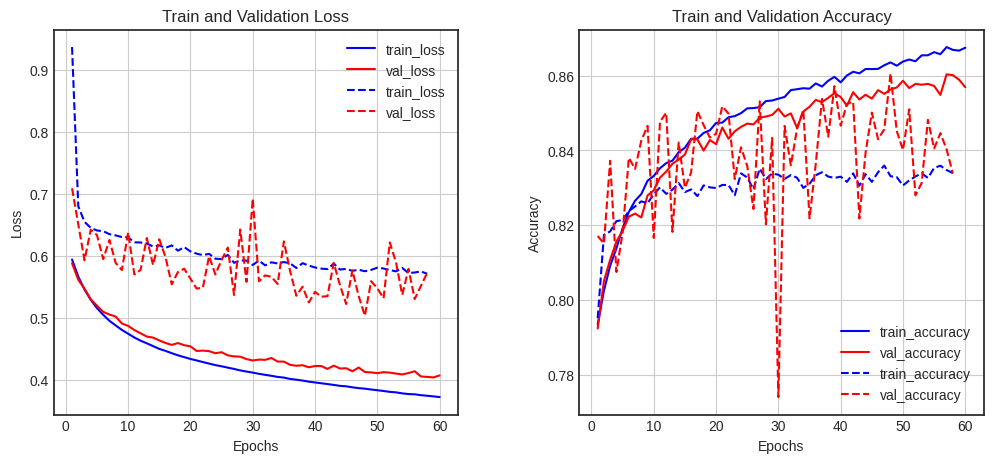

In [119]:
diff_history(history, history7)


In [120]:
indices = np.random.choice(len(x_test), 25, replace=False)
sample_images = x_test[indices]
sample_labels = y_test[indices]

In [121]:
predictions = model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


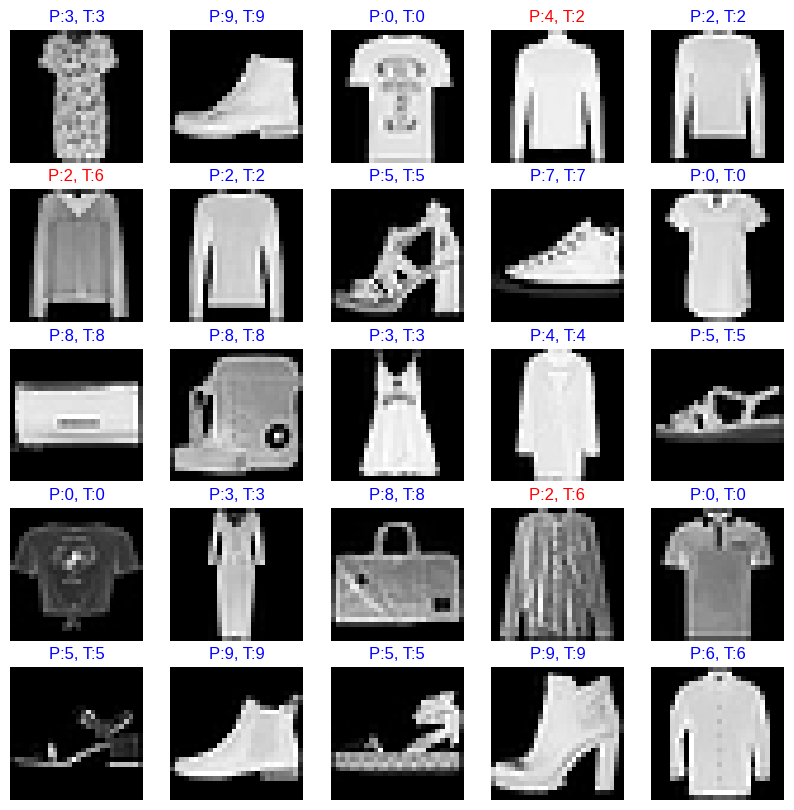

In [122]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    pred_label = np.argmax(predictions[i])
    true_label = sample_labels[i]

    color = "blue" if pred_label == true_label else "red"
    plt.title(f"P:{pred_label}, T:{true_label}", color=color)
plt.show()

In [123]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [124]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
404
102


In [125]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
from sklearn.model_selection import train_test_split
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
train_data = (train_data - mean) / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data = (test_data - mean) / std


x_train, y_train = train_data, train_labels
x_test, y_test = test_data, test_labels

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,      
    random_state=42    
)
print("Train:", x_train.shape)
print("Val:", x_val.shape)
print("Test:", x_test.shape)
print(train_data.mean(axis=0)[:5])  
print( train_data.std(axis=0)[:5])

Train: (323, 13)
Val: (81, 13)
Test: (102, 13)
[-1.01541438e-16  1.09923072e-17  1.74337992e-15 -1.26686340e-16
 -5.25377321e-15]
[1. 1. 1. 1. 1.]


In [126]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [127]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
history = model.fit(
    x_train, y_train,
    epochs=60,
    batch_size=16,
    validation_data=(x_val, y_val) 
)



Epoch 1/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 617.8062 - mae: 22.9791 - val_loss: 427.5881 - val_mae: 19.2948
Epoch 2/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 534.9464 - mae: 20.9594 - val_loss: 352.2481 - val_mae: 17.0786
Epoch 3/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 452.7562 - mae: 18.6737 - val_loss: 241.6939 - val_mae: 13.5951
Epoch 4/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 284.0977 - mae: 14.1927 - val_loss: 127.3279 - val_mae: 9.2822
Epoch 5/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 127.7335 - mae: 8.9251 - val_loss: 64.8496 - val_mae: 6.4488
Epoch 6/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 73.8603 - mae: 6.4754 - val_loss: 41.3160 - val_mae: 5.0775
Epoch 7/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 48.2109 - mae: 5.2540 - val_loss: 28.3389 - val_mae: 4.2211
Epoch 8/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.9120 - mae: 4.6710 - val_loss: 22.0707 - val_mae: 3.6540
Epoch 9/60
21/21 ━━━━━━━━━━━━━━━━━━━━ 0

/tmp/ipykernel_36/2438909638.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


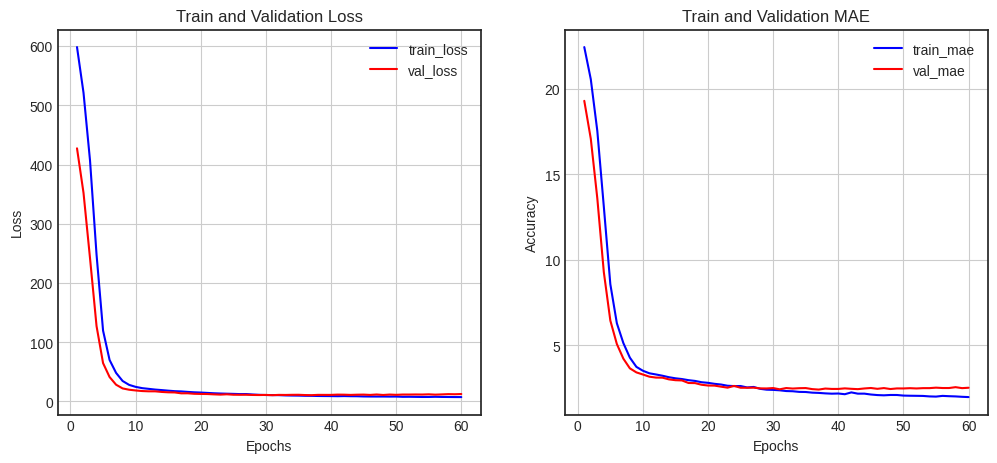

In [128]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [129]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.9941 - mae: 2.8090


[25.968647003173828, 3.07796049118042]

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [131]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# 2. train → train/val 분리 (25%를 검증 데이터로)
train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels,
    test_size=0.25,
    random_state=42
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
6736
2246
2246
46


In [132]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i,seq in enumerate(data):
    results[i,seq] = 1.0
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
from tensorflow.keras.utils import to_categorical

# 레이블을 원-핫 인코딩으로 변환
y_train = to_categorical(train_labels)
y_val   = to_categorical(val_labels)
y_test  = to_categorical(test_labels)

num_classes = y_train.shape[1]

print("y_train shape:", y_train.shape) 
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


y_train shape: (6736, 46)
y_val shape: (2246, 46)
y_test shape: (2246, 46)


In [133]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.

num_words = 3072

model = models.Sequential()
model.add(layers.Input(shape=(num_words,)))

model.add(layers.Dense(512, activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.summary()


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,266,734 (20.09 MB)

 Trainable params: 5,265,198 (20.09 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [134]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 46)             │        11,822 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,266,734 (20.09 MB)

 Trainable params: 5,265,198 (20.09 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [135]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

checkpoint_cb = callbacks.ModelCheckpoint(
    "reuters_best_model.h5",   
    save_best_only=True,       
    monitor="val_loss"        
)

earlystopping_cb = callbacks.EarlyStopping(
    monitor="val_loss",        
    patience=5,                
    restore_best_weights=True  
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystopping_cb],
    verbose=1
)


Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - accuracy: 0.4551 - loss: 2.5088 - val_accuracy: 0.7061 - val_loss: 2.2518
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.7652 - loss: 0.9992 - val_accuracy: 0.7119 - val_loss: 1.6493
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.8461 - loss: 0.6569 - val_accuracy: 0.7489 - val_loss: 1.2744
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.8967 - loss: 0.4433 - val_accuracy: 0.7992 - val_loss: 1.0077
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.9269 - loss: 0.3208 - val_accuracy: 0.8201 - val_loss: 0.8652
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - accuracy: 0.9372 - loss: 0.2666 - val_accuracy: 0.8295 - val_loss: 0.8170
Epoch 7/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - accuracy: 0.9499 - loss: 0.2036 - val_accuracy: 0.8308 - val_loss: 0.8343
Epoch 8/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.9592 - loss: 0.1640 - val_accuracy: 0.8281 - v

/tmp/ipykernel_36/1201330491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


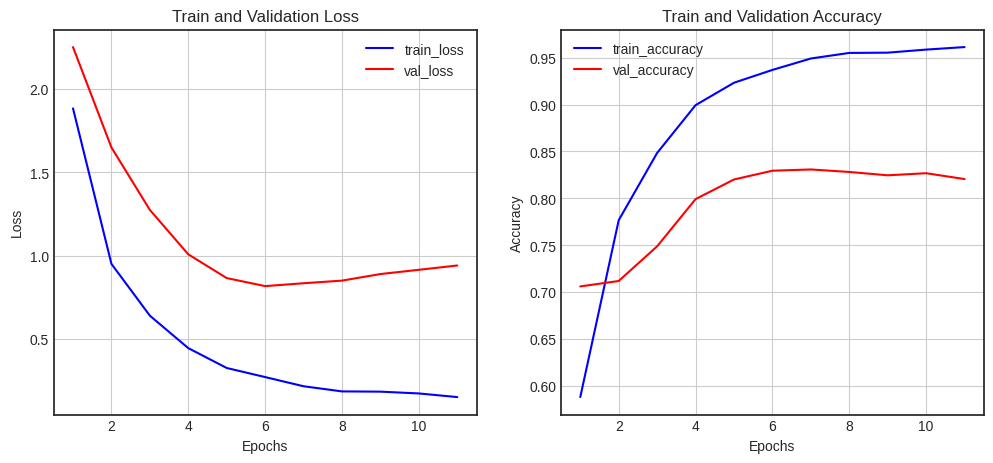

In [136]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [137]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test,y_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8055 - loss: 0.8912


[0.9050087332725525, 0.7996438145637512]

In [138]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [151]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 2. train → train/val 분리 (20%를 검증용으로)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=42

)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [152]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/tmp/ipykernel_36/2355943253.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


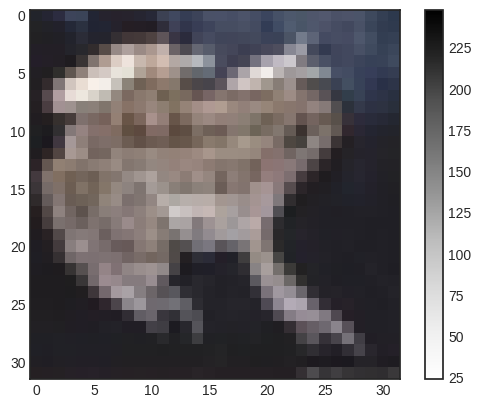

In [153]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [154]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [155]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((x_train.shape[0], 32 * 32 * 3))
x_val   = x_val.reshape((x_val.shape[0], 32 * 32 * 3))
x_test  = x_test.reshape((x_test.shape[0], 32 * 32 * 3))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [156]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.


In [157]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
num_words = 3072

model = models.Sequential()
model.add(layers.Input(shape=(num_words,)))

model.add(layers.Dense(512, activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])


In [158]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,710,346 (6.52 MB)

 Trainable params: 1,708,810 (6.52 MB)

 Non-trainable params: 1,536 (6.00 KB)

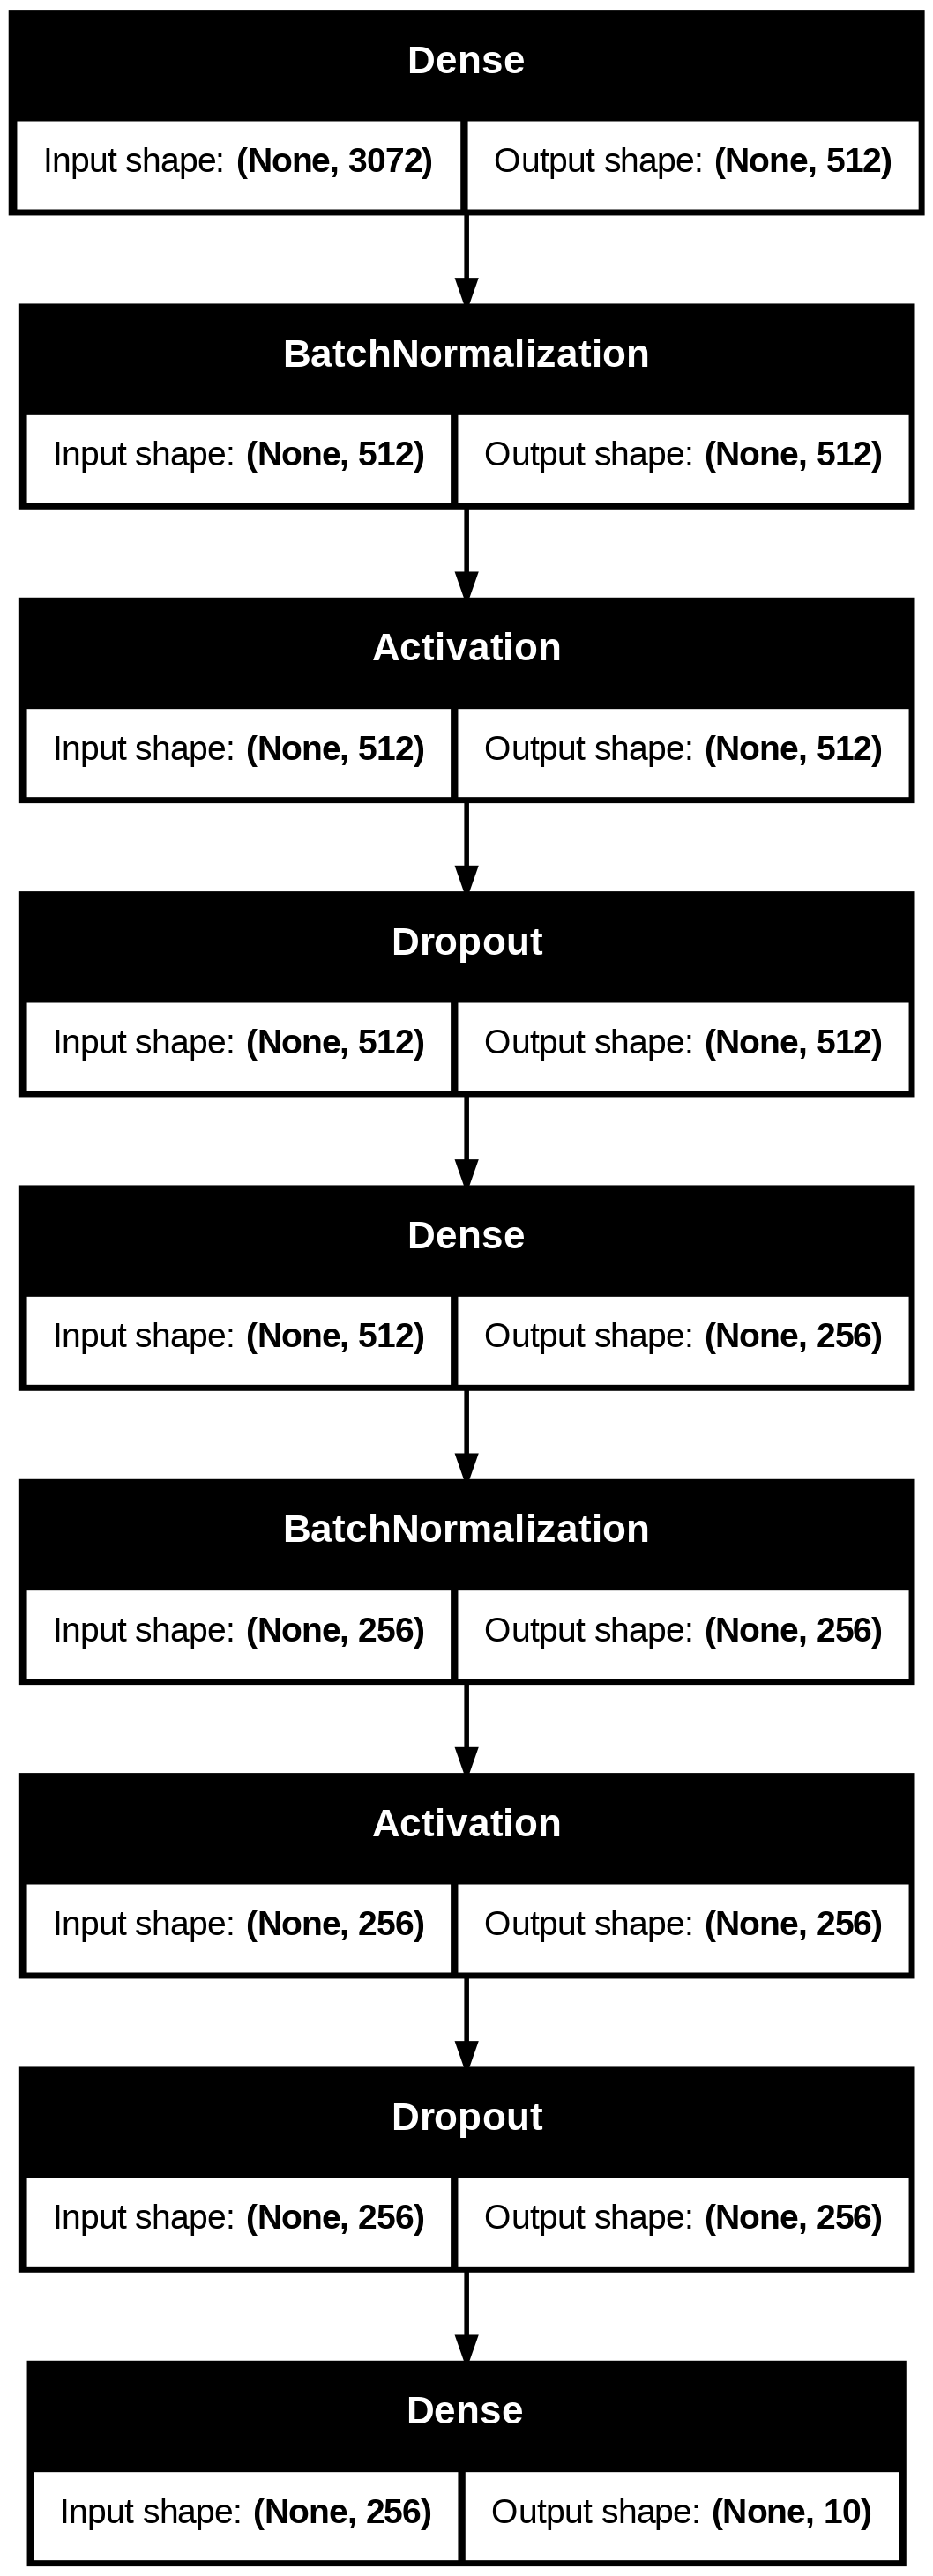

In [159]:
utils.plot_model(model, show_shapes=True)

In [160]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


checkpoint_cb = callbacks.ModelCheckpoint(
    "cifal10_best_model.h5",   
    save_best_only=True,       
    monitor="val_loss"        
)

earlystopping_cb = callbacks.EarlyStopping(
    monitor="val_loss",        
    patience=5,                
    restore_best_weights=True  
)

history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=128,
    validation_data=(x_val, y_val),
    callbacks=[checkpoint_cb, earlystopping_cb],
    verbose=1
)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.2638 - loss: 2.1960 - val_accuracy: 0.3414 - val_loss: 1.8362
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.3779 - loss: 1.7340 - val_accuracy: 0.3856 - val_loss: 1.7126
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4234 - loss: 1.5996 - val_accuracy: 0.3764 - val_loss: 1.7132
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.4490 - loss: 1.5474 - val_accuracy: 0.4547 - val_loss: 1.5762
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4619 - loss: 1.4987 - val_accuracy: 0.4020 - val_loss: 1.6449
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4690 - loss: 1.4648 - val_accuracy: 0.4053 - val_loss: 1.6181
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4839 - loss: 1.4387 - val_accuracy: 0.4452 - val_loss: 1.5585
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.4939 - loss: 1.4190 - val_a

/tmp/ipykernel_36/872333347.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


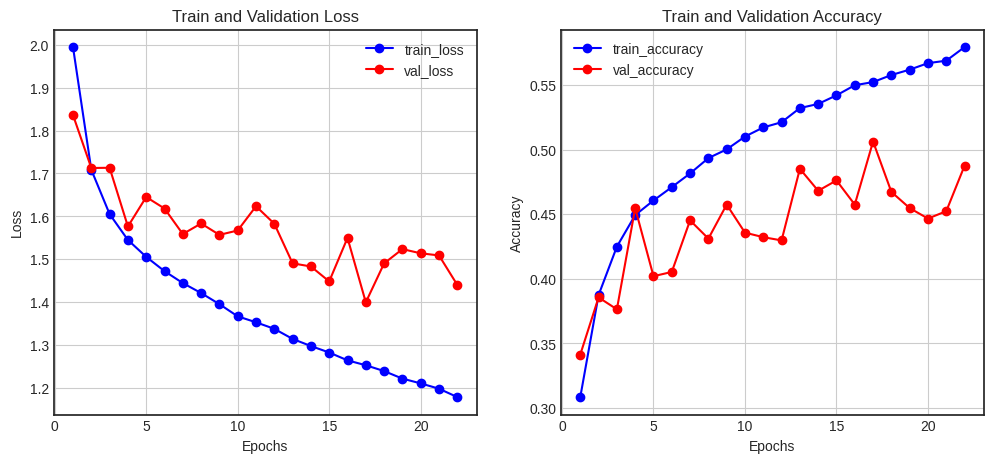

In [161]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-o', label='train_loss')
ax1.plot(epochs, val_loss, 'r-o', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-o', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-o', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [162]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5119 - loss: 1.3831


[1.387474775314331, 0.5063999891281128]